# Rainfalls time-series released by World Food Programme (WFP) 

The data regarding the rainfalls are provided by WFP: https://dataviz.vam.wfp.org/seasonal_explorer/rainfall_vegetation/visualizations#

We have collected only the data of the administrative regions considered in the *Food Consumption Score* and *Reduced Coping Strategy Index* surveys (see related notebooks for more details).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by wfp regarding the rainfalls stored in the 'wfp_data' folder.
path = "./wfp_data/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_subfolders = glob.glob(path + country + "/Rainfall/*")
    for subfolder in all_subfolders:
        adminstrata = ntpath.basename(subfolder).split(".")[0]
        # All the files of the years.
        all_files = glob.glob(subfolder + "/*.csv")
        for filename in all_files:
            df = pd.read_csv(filename, index_col = False)
            df["AdminStrata"] = adminstrata
            df["Country"] = country
            dfs.append(df)

In [5]:
# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete the duplicate rows of the dataframe (some date have duplicate information due to loading data from different files).
df.drop_duplicates(inplace = True)

In [6]:
# Select only the data beyond this year.
year = 2018
df = df.loc[df.Year >= year]
df.reset_index(drop = True, inplace = True)
df.head()

,Year,Month,Dekad,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average,AdminStrata,Country
0,2018,1,1,100.00,46.675774,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
1,2018,1,2,100.00,67.508865,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
2,2018,1,3,100.00,99.739753,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
3,2018,2,1,100.00,101.329070,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
4,2018,2,2,100.07,100.389922,0.007,0.0,Boucle-Du-Mouhoun,Burkina Faso


### Brief items description

- *Year*: reference year of the data collection;
- *Month*: reference month of the data collection;
- *Dekad*: reference month dekad of the data collection: these correspond to the calendar dates 1-10 (dekad 1), 11-20 (dekad 2), and 21-end of each month (dekad 3);
- *1 Month Anomaly (%)*: the value of 1 month rainfall anomaly in the reference period;
- *3 Months Anomaly (%)*: the value of 3 month rainfall anomaly in the reference period;
- *Value*: rainfall amount in the reference period;
- *Average*: long-term rainfall average for the same period;
- *AdminStrata*: the administrative region information;
- *Country*: the country information.

### Country item

In [7]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata item

In [8]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago. The rainfalls dataframe has the values of all the administrative regions.

In [9]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran',
       'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah',
       "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz'], dtype=object)

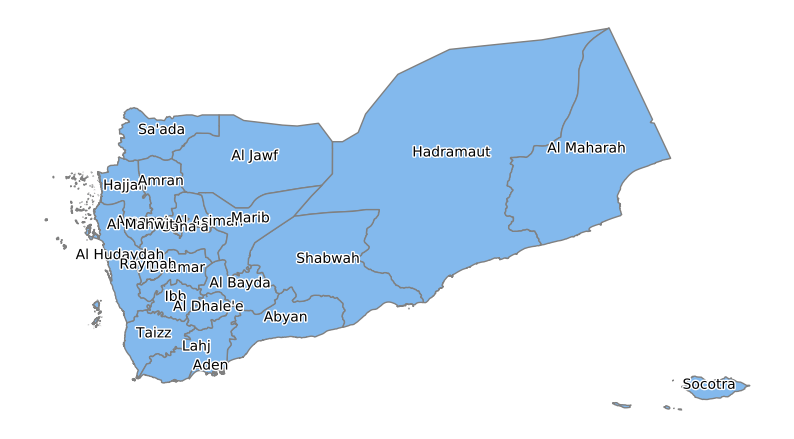

In [10]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_rainfall_yemen.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. The AdminStrata items of the rainfalls dataframe cover 3 administrative regions: Adamawa, Borno and Yobe.

In [11]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(3,)


array(['Adamawa', 'Borno', 'Yobe'], dtype=object)

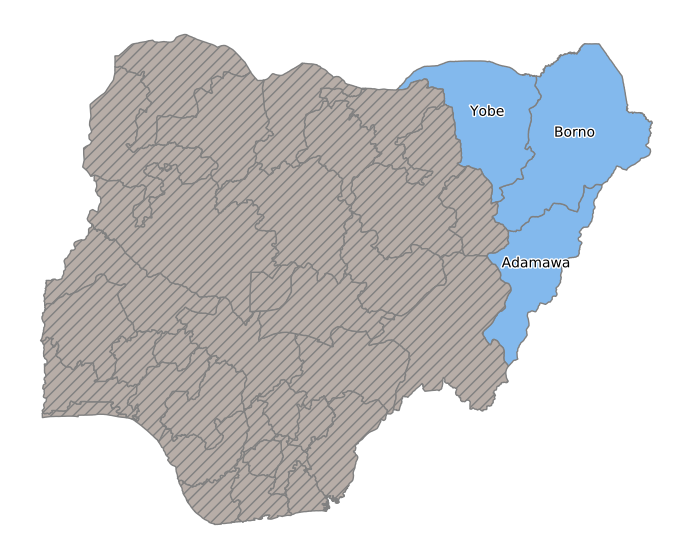

In [12]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True, 
                  annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_rainfall_nigeria.png", dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The rainfalls dataframe has the values of 13 administrative regions (Idleb administrative region not included).

In [13]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Al-Hasakeh', 'Aleppo', 'Ar-Raqqa', 'As-Sweida', 'Damascus',
       "Dar'a", 'Deir-ez-Zor', 'Hama', 'Homs', 'Lattakia', 'Quneitra',
       'Rural Damascus', 'Tartous'], dtype=object)

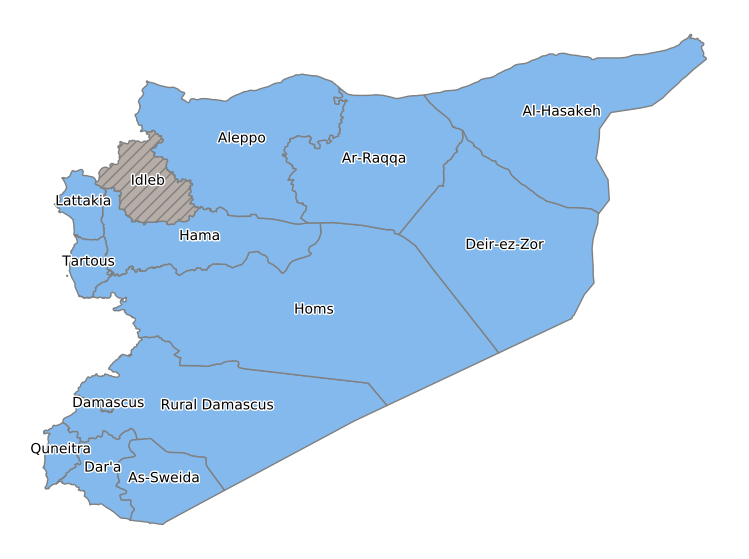

In [14]:
draw_adminstratas("Syria", AdminStratas["Syria"], AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_rainfall_syria.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The rainfalls dataframe has the values of all 13 administrative regions.

In [15]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est',
       'Centre-Nord', 'Centre-Ouest', 'Centre-Sud', 'Est',
       'Hauts-Bassins', 'Nord', 'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype=object)

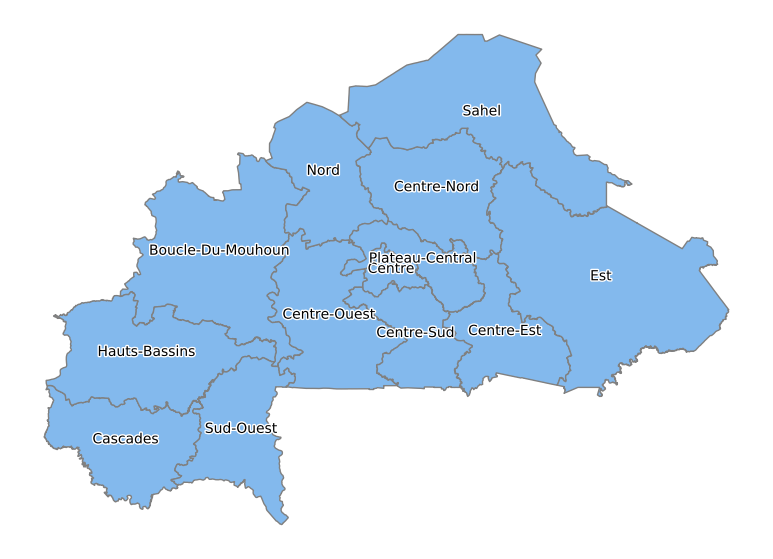

In [16]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_rainfall_burkina.png", dpi = 300)

## Creation of the time-series

We create the time-series for each administrative region using the following information: 1 Month Anomaly (%), 3 Month Anomaly (%) and the amount of rainfall.

In [17]:
# Convert the dekads to proper pandas datetime format.
# These correspond to the calendar dates 1-10, 11-20, and 21-end of each month. More precisely, we use the last day of these dekads as reference.
def dekad_to_day(row):
    date = pd.to_datetime(str(row["Year"]) + "-" + str(row["Month"]) + "-01")
    end_month = date.days_in_month
    dekad = row.Dekad   
    if dekad == 1:
        return 10
    if dekad == 2:
        return 20
    if dekad == 3:
        return end_month
    
df["Day"] = df.apply(dekad_to_day, axis = 1)
df.head()

,Year,Month,Dekad,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average,AdminStrata,Country,Day
0,2018,1,1,100.00,46.675774,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,10
1,2018,1,2,100.00,67.508865,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,20
2,2018,1,3,100.00,99.739753,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,31
3,2018,2,1,100.00,101.329070,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,10
4,2018,2,2,100.07,100.389922,0.007,0.0,Boucle-Du-Mouhoun,Burkina Faso,20


In [18]:
# Adjusting the dataframe.
df.drop(columns = "Dekad", inplace = True)
data = pd.to_datetime(df[["Year", "Month", "Day"]])
df.insert(1, "Datetime", data)
df.drop(["Year", "Month", "Day"], axis = 1, inplace = True)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average,AdminStrata,Country
0,2018-01-10,100.000000,46.675774,0.000,0.000,Boucle-Du-Mouhoun,Burkina Faso
1,2018-01-10,111.573472,115.588820,0.776,0.419,Abyan,Yemen
2,2018-01-10,106.869882,111.648471,1.986,1.727,Marib,Yemen
3,2018-01-10,100.590000,39.209627,0.001,0.000,Hauts-Bassins,Burkina Faso
4,2018-01-10,76.915727,76.710227,10.072,19.540,Al-Hasakeh,Syria


In [19]:
# Resampling the data to daily frequency.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average
0,Burkina Faso,Boucle-Du-Mouhoun,2018-01-10,100.0,46.675774,0.0,0.0
1,Burkina Faso,Boucle-Du-Mouhoun,2018-01-11,NaN,NaN,NaN,NaN
2,Burkina Faso,Boucle-Du-Mouhoun,2018-01-12,NaN,NaN,NaN,NaN
3,Burkina Faso,Boucle-Du-Mouhoun,2018-01-13,NaN,NaN,NaN,NaN
4,Burkina Faso,Boucle-Du-Mouhoun,2018-01-14,NaN,NaN,NaN,NaN


In [20]:
# Rename some columns.
df.rename(columns = {"3 Months Anomaly (%)": "3 Months Anomaly Rainfalls (%)", "Value": "Rainfalls (mm)", "1 Month Anomaly (%)": "1 Month Anomaly Rainfalls (%)"}, inplace = True)
# Delete average column (not of interest).
df.drop(columns = "Average", inplace = True)

In [21]:
# Create multi-index column dataframe.
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"]).reorder_levels([1, 2, 0], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
df.columns.rename("Country", level = 0, inplace = True)
df.columns.rename("AdminStrata", level = 1, inplace = True)
df.columns.rename("Indicator", level = 2, inplace = True)
freq = "D"
df.index.freq = freq
df.head()

Country                      Burkina Faso                                 \
AdminStrata             Boucle-Du-Mouhoun                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                      46.675774   
2018-01-11                            NaN                            NaN   
2018-01-12                            NaN                            NaN   
2018-01-13                            NaN                            NaN   
2018-01-14                            NaN                            NaN   

Country                                                   \
AdminStrata                                     Cascades   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                   
2018-01-10             0.0                    105.088605   
2018-01-11             NaN                           NaN   
2018-01-12             NaN                           NaN   
2018-01-13             NaN                           NaN   
2018-01-14             NaN                           NaN   

Country                                                    \
AdminStrata                                                 
Indicator   3 Months Anomaly Rainfalls (%) Rainfalls (mm)   
Datetime                                                    
2018-01-10                       45.040303          0.027   
2018-01-11                             NaN            NaN   
2018-01-12                             NaN            NaN   
2018-01-13                             NaN            NaN   
2018-01-14                             NaN            NaN   

Country                                                                   \
AdminStrata                        Centre                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                       76.26391   
2018-01-11                            NaN                            NaN   
2018-01-12                            NaN                            NaN   
2018-01-13                            NaN                            NaN   
2018-01-14                            NaN                            NaN   

Country                                                   ...          Yemen  \
AdminStrata                                   Centre-Est  ...         Sana'a   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)  ... Rainfalls (mm)   
Datetime                                                  ...                  
2018-01-10             0.0                    101.619352  ...           0.95   
2018-01-11             NaN                           NaN  ...            NaN   
2018-01-12             NaN                           NaN  ...            NaN   
2018-01-13             NaN                           NaN  ...            NaN   
2018-01-14             NaN                           NaN  ...            NaN   

Country                                                                   \
AdminStrata                       Shabwah                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                     105.149317                     108.365589   
2018-01-11                            NaN                            NaN   
2018-01-12                            NaN                            NaN   
2018-01-13                            NaN                            NaN   
2018-01-14                            NaN                            NaN   

Country                                                   \
AdminStrata                                      Socotra   
Indicator   R

In [22]:
# Keep the dekads date.
df = df.loc[(df.index.day == 10) | (df.index.day == 20) | (df.index.is_month_end)]
df = df.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()])
df.head()

Country                      Burkina Faso                                 \
AdminStrata             Boucle-Du-Mouhoun                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                         100.00                      46.675774   
2018-01-20                         100.00                      67.508865   
2018-01-31                         100.00                      99.739753   
2018-02-10                         100.00                     101.329070   
2018-02-20                         100.07                     100.389922   

Country                                                   \
AdminStrata                                     Cascades   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                   
2018-01-10           0.000                    105.088605   
2018-01-20           0.000                    102.675818   
2018-01-31           0.000                    100.328456   
2018-02-10           0.000                    116.900029   
2018-02-20           0.007                    119.447241   

Country                                                    \
AdminStrata                                                 
Indicator   3 Months Anomaly Rainfalls (%) Rainfalls (mm)   
Datetime                                                    
2018-01-10                       45.040303          0.027   
2018-01-20                       58.606953          0.020   
2018-01-31                      112.112356          0.033   
2018-02-10                      123.595840          1.886   
2018-02-20                      125.107418          1.133   

Country                                                                   \
AdminStrata                        Centre                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                      76.263910   
2018-01-20                          100.0                      99.588561   
2018-01-31                          100.0                     100.600216   
2018-02-10                          100.0                     100.000000   
2018-02-20                          100.1                     100.100000   

Country                                                   ...          Yemen  \
AdminStrata                                   Centre-Est  ...         Sana'a   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)  ... Rainfalls (mm)   
Datetime                                                  ...                  
2018-01-10            0.00                    101.619352  ...          0.950   
2018-01-20            0.00                    101.279744  ...          0.647   
2018-01-31            0.00                    100.000000  ...          1.114   
2018-02-10            0.00                    101.258993  ...          2.328   
2018-02-20            0.01                    104.198664  ...          2.376   

Country                                                                   \
AdminStrata                       Shabwah                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                     105.149317                     108.365589   
2018-01-20                     104.986301                     109.041046   
2018-01-31                     104.754504                     109.105315   
2018-02-10                     107.755281                     111.777320   
2018-02-20                     108.963067                     111.735197   

Country                                                   \
AdminStrata                                      Socotra   
Indicator   R

In [23]:
# Now check if it is necessary interpolate the NaN values at dekadly frequency.
# Check if the dataframe contains NaN values in correspondence of the dekades.
check_nan = df.groupby(axis = 1, level = [0, 1, 2]).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()].isnull().sum(axis = 1).sum())
check_nan

Country       AdminStrata        Indicator                     
Burkina Faso  Boucle-Du-Mouhoun  1 Month Anomaly Rainfalls (%)     0
                                 3 Months Anomaly Rainfalls (%)    0
                                 Rainfalls (mm)                    0
              Cascades           1 Month Anomaly Rainfalls (%)     0
                                 3 Months Anomaly Rainfalls (%)    0
                                                                  ..
Yemen         Socotra            3 Months Anomaly Rainfalls (%)    0
                                 Rainfalls (mm)                    0
              Taizz              1 Month Anomaly Rainfalls (%)     0
                                 3 Months Anomaly Rainfalls (%)    0
                                 Rainfalls (mm)                    0
Length: 153, dtype: int64

In [24]:
# Total NaN values.
check_nan.sum()

0

In [25]:
# Resample data to daily level (as before) reobtaining the dekadly frequency.
df_dekad = df.groupby(axis = 1, level = [0, 1, 2], group_keys = False).resample("D").mean()
freq = "D"
df_dekad.index.freq = freq
df_dekad.head()

Country                      Burkina Faso                                 \
AdminStrata             Boucle-Du-Mouhoun                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                      46.675774   
2018-01-11                            NaN                            NaN   
2018-01-12                            NaN                            NaN   
2018-01-13                            NaN                            NaN   
2018-01-14                            NaN                            NaN   

Country                                                   \
AdminStrata                                     Cascades   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                   
2018-01-10             0.0                    105.088605   
2018-01-11             NaN                           NaN   
2018-01-12             NaN                           NaN   
2018-01-13             NaN                           NaN   
2018-01-14             NaN                           NaN   

Country                                                    \
AdminStrata                                                 
Indicator   3 Months Anomaly Rainfalls (%) Rainfalls (mm)   
Datetime                                                    
2018-01-10                       45.040303          0.027   
2018-01-11                             NaN            NaN   
2018-01-12                             NaN            NaN   
2018-01-13                             NaN            NaN   
2018-01-14                             NaN            NaN   

Country                                                                   \
AdminStrata                        Centre                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                       76.26391   
2018-01-11                            NaN                            NaN   
2018-01-12                            NaN                            NaN   
2018-01-13                            NaN                            NaN   
2018-01-14                            NaN                            NaN   

Country                                                   ...          Yemen  \
AdminStrata                                   Centre-Est  ...         Sana'a   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)  ... Rainfalls (mm)   
Datetime                                                  ...                  
2018-01-10             0.0                    101.619352  ...           0.95   
2018-01-11             NaN                           NaN  ...            NaN   
2018-01-12             NaN                           NaN  ...            NaN   
2018-01-13             NaN                           NaN  ...            NaN   
2018-01-14             NaN                           NaN  ...            NaN   

Country                                                                   \
AdminStrata                       Shabwah                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                     105.149317                     108.365589   
2018-01-11                            NaN                            NaN   
2018-01-12                            NaN                            NaN   
2018-01-13                            NaN                            NaN   
2018-01-14                            NaN                            NaN   

Country                                                   \
AdminStrata                                      Socotra   
Indicator   R

In [26]:
# Plot the time-series.
TsIP(df_dekad).interactive_plot_df(matplotlib = False, style = "mix", yaxis = "Rainfall", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [27]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [28]:
# Save the time-series.
df_dekad.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rainfall-dekad"));

## Adjustment of the rainfalls time-series to the daily time coverage of the FCG <= 2 indicator

Now, we manage the current data keeping only the administrative regions present in the FCG <= 2 analysis. Furthermore, we aggregate data following the FCG <= 2 data collection: the FCG <= 2 value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but in a greater time range. For example, for the provinces of Yemen it corresponds to the percentage of poor and borderline people in the previous 31 days. We therefore adapt the time-series of the rainfalls to take into account this consideration.

In [29]:
def daily_fit(group):
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    if indicator == "Rainfalls (mm)":
        # We get the group with time-step of the day filling NaN values with previous value dekad.
        group = group.fillna(method = "bfill")
        # Furthermore, being the values of the dekaed the tot rainfalls happened in that interval we divide for the days in the range of the corresponding dekad.
        def dekad_day_norm(row):
            if row.name.day >= 1 or row.name.day <= 10:
                return row/10
            if row.name.day >= 11 or row.name.day <= 20:
                return row/10
            if row.name.day >= 21:
                return row/(row.name.days_in_month-20)
        group = group.apply(dekad_day_norm, axis = 1)
    else:
        group = group.interpolate(method = "linear")
        
    return group

df_fit_day = df_dekad.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(daily_fit)
df_fit_day.head()

Country                      Burkina Faso                                 \
AdminStrata             Boucle-Du-Mouhoun                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                      46.675774   
2018-01-11                          100.0                      48.759083   
2018-01-12                          100.0                      50.842392   
2018-01-13                          100.0                      52.925701   
2018-01-14                          100.0                      55.009011   

Country                                                   \
AdminStrata                                     Cascades   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                   
2018-01-10             0.0                    105.088605   
2018-01-11             0.0                    104.847326   
2018-01-12             0.0                    104.606048   
2018-01-13             0.0                    104.364769   
2018-01-14             0.0                    104.123490   

Country                                                    \
AdminStrata                                                 
Indicator   3 Months Anomaly Rainfalls (%) Rainfalls (mm)   
Datetime                                                    
2018-01-10                       45.040303         0.0027   
2018-01-11                       46.396968         0.0020   
2018-01-12                       47.753633         0.0020   
2018-01-13                       49.110298         0.0020   
2018-01-14                       50.466963         0.0020   

Country                                                                   \
AdminStrata                        Centre                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                          100.0                      76.263910   
2018-01-11                          100.0                      78.596375   
2018-01-12                          100.0                      80.928840   
2018-01-13                          100.0                      83.261305   
2018-01-14                          100.0                      85.593770   

Country                                                   ...          Yemen  \
AdminStrata                                   Centre-Est  ...         Sana'a   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)  ... Rainfalls (mm)   
Datetime                                                  ...                  
2018-01-10             0.0                    101.619352  ...         0.0950   
2018-01-11             0.0                    101.585391  ...         0.0647   
2018-01-12             0.0                    101.551431  ...         0.0647   
2018-01-13             0.0                    101.517470  ...         0.0647   
2018-01-14             0.0                    101.483509  ...         0.0647   

Country                                                                   \
AdminStrata                       Shabwah                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-01-10                     105.149317                     108.365589   
2018-01-11                     105.133016                     108.433135   
2018-01-12                     105.116714                     108.500681   
2018-01-13                     105.100412                     108.568226   
2018-01-14                     105.084111                     108.635772   

Country                                                   \
AdminStrata                                      Socotra   
Indicator   R

In [30]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    # Load the information regarding the FCG <= 2 survey.
    fcs_coverage = pd.read_csv("../Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-SvyDateRange.csv" % country, header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Ignore the adminstrata not considered in the FCG <= 2 survey.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique():
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Sliding window according to the coverage of the FCG <= 2 analysis.
        start_svy = fcs_coverage_adminstrata.index[0]
        end_svy = fcs_coverage_adminstrata.index[-1]
        new_group = group.loc[start_svy:end_svy].copy()
        for index in new_group.index:
            look_back = int(fcs_coverage_adminstrata.loc[index].values[0])
            # Window over the column.
            if indicator == "Rainfalls (mm)":
                new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].sum() 
            else:
                new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].mean() 
        return new_group
    else:
        pass
    
df_SvyWindow = df_fit_day.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country                      Burkina Faso                                 \
AdminStrata             Boucle-Du-Mouhoun                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-07-02                            NaN                            NaN   
2018-07-03                            NaN                            NaN   
2018-07-04                            NaN                            NaN   
2018-07-05                            NaN                            NaN   
2018-07-06                            NaN                            NaN   

Country                                                   \
AdminStrata                                     Cascades   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                   
2018-07-02             NaN                           NaN   
2018-07-03             NaN                           NaN   
2018-07-04             NaN                           NaN   
2018-07-05             NaN                           NaN   
2018-07-06             NaN                           NaN   

Country                                                    \
AdminStrata                                                 
Indicator   3 Months Anomaly Rainfalls (%) Rainfalls (mm)   
Datetime                                                    
2018-07-02                             NaN            NaN   
2018-07-03                             NaN            NaN   
2018-07-04                             NaN            NaN   
2018-07-05                             NaN            NaN   
2018-07-06                             NaN            NaN   

Country                                                                   \
AdminStrata                        Centre                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-07-02                            NaN                            NaN   
2018-07-03                            NaN                            NaN   
2018-07-04                            NaN                            NaN   
2018-07-05                            NaN                            NaN   
2018-07-06                            NaN                            NaN   

Country                                                   ...          Yemen  \
AdminStrata                                   Centre-Est  ...         Sana'a   
Indicator   Rainfalls (mm) 1 Month Anomaly Rainfalls (%)  ... Rainfalls (mm)   
Datetime                                                  ...                  
2018-07-02             NaN                           NaN  ...         5.4919   
2018-07-03             NaN                           NaN  ...         7.0160   
2018-07-04             NaN                           NaN  ...         8.5401   
2018-07-05             NaN                           NaN  ...        10.0642   
2018-07-06             NaN                           NaN  ...        11.5883   

Country                                                                   \
AdminStrata                       Shabwah                                  
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-07-02                     116.913496                     125.808795   
2018-07-03                     116.522007                     126.740336   
2018-07-04                     116.191857                     127.691843   
2018-07-05                     115.923045                     128.663316   
2018-07-06                     115.715573                     129.654756   

Country                                                   \
AdminStrata                                      Socotra   
Indicator   R

In [31]:
# Plot the time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Rainfall", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [32]:
# Save the time-series.
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rainfall-day"));